# Algoritmos de Clustering

Semana Tec

Profesores: Luz Eunice Angeles /José Ignacio Treviño

**Clústering** se refiere a métodos que nos ayudan a formar subgrupos dentro de un conjunto de datos. La idea es que las observaciones que pertenezcan a un mismo grupo o *cluster* tengan **características similares** entre sí.

A este tipo de algoritmos los clasificamos como **aprendizaje no supervisado** porque no tenemos una **variable de respuesta o dependiente** que queramos predecir. En este caso no tenemos una **etiqueta** en los datos (no hay variable $y$). 

Un ejemplo clásico de clusterización es cuando queremos hacer una *segmentación de mercado*. Usualmente, las compañías cuentan con datos específicos de sus clientes. Con un algoritmo de clústering, se pueden formar grupos específicos de clientes que sean más receptivos a ciertas campañas.

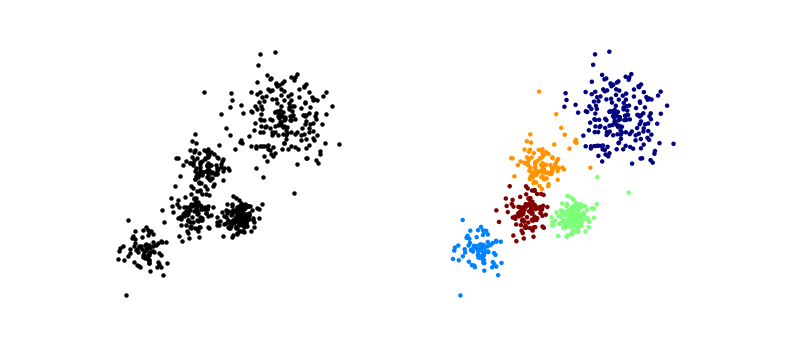

El algoritmo más popular de clústering se llama *K-means*.

# K-Means

La premisa del algoritmo K-Means es definir $n$ grupos de tal manera que la distancia de los datos que pertenecen a cada grupo al centro de su respectivo grupo sea la más pequeña posible.

Matemáticamente, lo que queremos minimizar es la **within/intra-cluster sum of squares** (WCSS):
$$
W\biggl(\bigcup_{i=1}^k C_i\biggr) 
= \sum_{i=1}^k W(C_i) 
= \sum_{i=1}^k \biggl( \sum_{\boldsymbol x \in C_i} \| \boldsymbol x - \mu_i \|^2 \biggr)
$$

donde
- $k$ es el número de clústers que vamos a formar, 
- $C = \{C_1, C_2, \dots, C_k\}$, son los grupos a formar,
- $\boldsymbol x$ representan las observaciones,
- $\boldsymbol \mu_i$ es el punto céntrico del grupo $C_i$

Los pasos a realizar son:

  - Input: Definir el número de clústers
  - 1\. Formar aleatoriamente grupos.
  - 2\. En un ciclo:
    - a\. Para cada clúster, calcular el centroide (promedio de las observaciones).
    - b\. Reasignar a cada observación a un nuevo clúster tomando en cuenta la distancia al centroide más cercano.

Este proceso se repite hasta que los clústers ya no cambien.

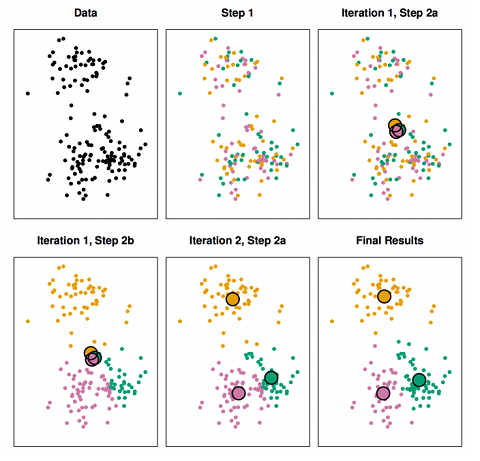

La pregunta ahora es ¿Cuál es el número de clústers que hay que escoger?

La mayoría de las veces, el valor de $k$ viene determinado por la necesidad de negocio o del problema. Por ejemplo, en el caso de segmentación de mercado, puede ser que la dirección solicite crear N grupos para categorizar a sus clientes.

Sin embargo, existen metaheurísticas que nos ayudan a determinar este número con un fundamento mayor.

In [ ]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# Vamos a cargar los datos de clústering.
cluster_df = pd.read_csv('data/cluster data.csv')
cluster_df.head()

Los datos de la tabla anterior fueron generados para formar naturalmente 5 clústers:
1. Centro en (-2, -3). 100 observaciones con varianza de 0.75
2. Centro en (-5, -5). 75 observaciones con varianza de 0.75
3. Centro en (4, 3). 75 observaciones con varianza de 1.5
4. Centro en (1, -3). 75 observaciones con varianza de 0.5
5. Centro en (-1, -0.15). 75 observaciones con varianza de 0.75

Vamos a observar los datos. Quizás a simple vista no alcancemos a ver los 5 grupos.

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=cluster_df, x='x0',y='x1')

Método K-Means:
```python
# Importar la librería de Kmeans
from sklearn.cluster import KMeans
# Importar la librería para silhouette score
from sklearn.metrics import silhouette_score

# Seleccionar el número de clusters
model = KMeans(n_clusters = k)
# Correr algoritmo
groups = model.fit_predict(X)
# Los centros de los grupos se guardan en cluster_centers_
centros = model.cluster_centers_
# Las distancias se guardan en inertia_
wcss = model.inertia_
# Mostrar los grupos (opcional)
# pseudocódigo!
plot(X, color=groups)
```

Ahora, vamos a utilizar el método de K-Means para formar grupos y encontrar el número óptimo al correr el algoritmo para diferentes valores de k

In [ ]:
from sklearn.cluster import KMeans
# Para calcular las distancias a los centros
from scipy.spatial.distance import cdist


# Vamos a formar grupos de 2, 3, ..., hasta 13
grupos = np.arange(2,14)

# Crear figura con 12 gráficos
fig, axs = plt.subplots(4,3,figsize=(15,15),sharex=True, sharey=True)

# Crear el vector para almacenar las distancias
wcss = np.zeros(12)
i = 0

# Ciclo 
for k, ax in zip(grupos, axs.flatten()):
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(cluster_df)
    # Las distancias a los centros se guardan en el atributo .inertia_ del modelo
    wcss[i] = model.inertia_
    # Centros de los grupos
    centros = model.cluster_centers_
    
    # Graficar los grupos
    sns.scatterplot(data=cluster_df, x='x0',y='x1', c=clusters, cmap='viridis',ax=ax)
    # Graficar los centros
    ax.scatter(x=centros[:,0], y=centros[:,1], color='red', marker='*', s=50)
    
    ax.set_ylim(bottom =-9, top =8)
    ax.text(-8, 8, f"k={k}",
            fontsize=24,
            horizontalalignment='left',
            verticalalignment='top')
    # Actualizar contador
    i += 1

In [ ]:
# En el ciclo anterior fuimos guardando las distancias a los centros.
# Vamos a graficarlas.
fig = plt.figure(figsize=(6,4))
plt.plot(grupos, wcss)
plt.title('Suma de las distancias a los centros')
plt.xlabel('N grupos')
plt.ylabel('WCSS')

Una manera empírica para seleccionar el número de grupos es observar la gráfica enterior y buscar el punto donde se pase de tener un gran cambio a un cambio menor. Este es el **método del codo**. Como el nombre sugiere, en la gráfica de las distancias hay que buscar el *doblez* del codo.

Conforme aumentamos el número de grupos, la suma de las distancias siempre disminuye. En la gráfica podemos observar lo siguiente

  - Ir de 2 a 3 grupos disminuye considerablemente la WCSS.
  - Ir de 3 a 4 grupos disminuye considerablemente la WCSS.
  - Ir de 4 a 5 grupos disminuye considerablemente la WCSS.
  - Ir de 5 a 6 grupos disminuye moderadamente la WCSS.

Visualmente, este cambio en la disminución se representa como el *doblez* del codo.

# Silhouette Score

Silhouette se refiere a un método de interpretación y validación de la coherencia dentro del análisis de grupos. Es una medida de la condfiabilidad de que cada observación pertenezca a su respectivo clúster.

Para cada observación $x_i$:

 - $a(i)$ es la distancia promedio de $x_i$ con los datos que pertenecen al mismo clúster.
 - $b(i)$ es la distancia promedio de $x_i$ con los puntos del clúster más cercano.
    - "cercano" significa que es el clúster con menor valor de $b(i)$

$$\text{silhouette}(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

El score que buscamos para evaluar la agrupación es el promedio de silhouette score de todos los puntos.

In [ ]:
from sklearn.metrics import silhouette_score
# Sacar el score Silhouette de cada agrupación
silhouette_sc = np.zeros(12)
grupos = np.arange(2,14)
i=0

for k in grupos:
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(cluster_df)
    silhouette_sc[k-2] = silhouette_score(cluster_df, clusters, metric='euclidean')

plt.plot(grupos, silhouette_sc)
plt.ylabel('Silhouette Score')
plt.xlabel('N Grupos')

# Decidiendo el número de clústers

Un valor de Score más cercano a 1 significa que los grupos están definidos y separados entre sí. Los valores más altos son para 4 y 5 grupos. Esto en conjunto con la gráfica del método del codo nos indican que el número óptimo de grupos es **5**.

In [ ]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(cluster_df)
# Vamos a agregar el indicador de cluster como una nueva columna
cluster_df['Grupo'] = clusters
cluster_df.head()

In [ ]:
# Vamos a calcular estadísticos de los datos agrupando por el grupo
cluster_df.groupby('Grupo').mean()

In [ ]:
# Veamos ahora los centros de los cluster. ¡Son los mismos!
pd.DataFrame(model.cluster_centers_, columns=['x0','x1'])

Recordemos cómo se formaron los datos:
- a) Centro en (-2, -3). 100 observaciones con varianza de 0.75
- b) Centro en (-5, -5). 75 observaciones con varianza de 0.75
- c) Centro en (4, 3). 75 observaciones con varianza de 1.5
- d) Centro en (1, -3). 75 observaciones con varianza de 0.5
- e) Centro en (-1, -0.15). 75 observaciones con varianza de 0.75

Si comparamos los centroides y las desviaciones de cada grupo resultante del clustering contra los grupos originales, podemos ver la siguiente correspondencia:
- Grupo 0 - d
- Grupo 1 - c
- Grupo 2 - b
- Grupo 3 - e
- Grupo 4 - a

# Ejemplo de KMeans: Segmentación de clientes

La segmentación clientes es una herramienta poderosa para poder identificar grupos con características particulares y necesidades por satisfacer. La manera más común para hacer una segmentación de clientes es con:

* Información demográfica: edad, género, familia, estado civil, nivel de educación, ocupación, etc.
* Información geográfica: dirección, ciudad, estado, código postal, etc.
* Datos de comportamiento: hábitos de consumo, uso de productos/servicios, etc.

Algunos de los beneficios de la segmentación de clientes son:
- Ayuda para definir el precio adecuado de un producto/servicio.
- Enfocan las campañas de marketing a clientes con potencial de compra.
- mejor diseño de estrategias de distribución de productos.
- Selección de características de un producto.

La siguiente tabla contiene datos simulados de clientes de un centro comercial, donde a través de una membresía se logró recolectar datos como edad, género, ingreso promedio anual. Además, con esta membresía se le asigna a cada cliente una calificación de acuerdo a sus hábitos de consumo.

In [ ]:
mall_df = pd.read_csv('data/Mall_Customers.csv')
mall_df.head()

In [ ]:
# Resumen estadístico
mall_df.describe()

In [ ]:
# Graficar las variables numéricas
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=mall_df, y = 'Age', ax=axs[0])
sns.boxplot(data=mall_df, y = 'Annual Income (k$)', ax=axs[1])
sns.boxplot(data=mall_df, y = 'Spending Score (1-100)', ax=axs[2])

In [ ]:
# Podemos incluir el género en los boxplots
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=mall_df, y = 'Age', x='Gender', ax=axs[0])
sns.boxplot(data=mall_df, y = 'Annual Income (k$)', ax=axs[1], x='Gender')
sns.boxplot(data=mall_df, y = 'Spending Score (1-100)', ax=axs[2], x='Gender')

In [ ]:
# Vamos a crear clusters utilizando tres de las variables: calificación, # de reseñas y precio
# Primero vamos a hacer scatterplots de la combinación de estas variables
# Una manera rápida y fácil es con la función pairplot de Seaborn
col_numericas = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
datos = mall_df.loc[:, col_numericas]
sns.pairplot(data=datos)

In [ ]:
# Opcional, podemos separar los datos por género. Esto lo hacemos agregando Gender a los datos y usando el parámetro hue:
sns.pairplot(data=mall_df.drop('CustomerID', axis=1), hue='Gender')

Podemos observar que las tres variables con las que vamos a trabajar tienen **escalas** muy diferentes:
* La edad va de 18 a 70
* El ingreso anual van de 15 a 137 kUSD
* El puntaje de gasto varía de 1 a 100

Esto puede afectar el algoritmo de KMeans, puesto que es un método que utiliza **distancia euclidiana** para calcular la cercanía de cada dato a los centroides. Cuando trabajemos con algoritmos que requieran el cálculo de esta distancia euclidiana, lo recomentable es **normalizar** las variables para eliminar la diferencia en las escalas.

Para normalizar variables en Python, utilizamos StandardScaler de SkLearn:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
```

In [ ]:
# Vamos a escalar las tres variables con StandardScaler. ¿De dónde proviene el nombre Standard?
from sklearn.preprocessing import StandardScaler

# Hacemos el escalamiento.
scaler = StandardScaler()
datos_norm = scaler.fit_transform(datos)
# El escalador nos genera una matriz de numpy
# El orden de las columnas se mantiene
datos_norm

In [ ]:
# Para mantener un orden, vamos a convertir la matriz a data frame de pandas
datos_norm = pd.DataFrame(datos_norm, columns=datos.columns)
datos_norm.head()

In [ ]:
# Ya con los datos normalizados, ya podemos utilizar el algoritmo de KMeans. Primero hacemos la gráfica del codo y la de sihlouette score
# Podemos empezar con grupos de 2 a 10

# Importar librerias en caso de no haberlo hecho antes
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

grupos = np.arange(2, 16)
wcss   = np.zeros(14)
sil_score = np.zeros(14)

for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(datos_norm)
    # WCSS
    wcss[k-2] = model.inertia_
    # Silhouette Score
    sil_score[k-2] = silhouette_score(datos_norm, clusters)
    
# Vamos a graficar el codo y silhouette score en la misma gráfica
# Recordemos que subplots nos permite tener más gráficas en la misma figura
fig, axs = plt.subplots(1,2, figsize=(15,6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

De las gráficas anteriores, 6 sepresenta un buen número de grupos.

In [ ]:
# Generamos los 4 grupos
model = KMeans(n_clusters=6)
clusters = model.fit_predict(datos_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
datos['Grupo'] = clusters

In [ ]:
# Podemos agregar los colores en el pairplot para ver las características de cada grupo
# Para el mapa de color revisar: 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html#:~:text=Matplotlib%20has%20a%20number%20of%20built-in%20colormaps%20accessible,your%20own%20colormaps,%20see%20Creating%20Colormaps%20in%20Matplotlib.

sns.pairplot(data=datos, hue='Grupo', palette='magma')

In [ ]:
# Vamos a graficar las 3 variables al mismo tiempo. Para ello, necesitamos importar una librería más
from mpl_toolkits.mplot3d import Axes3D

# Creamos la figura donde graficaremos
fig = plt.figure(figsize=(8, 6))
# Crearemos un gráfico 3D. rect nos indica el tamaño de los ejes y donde inician.
# elev y azim controlan la elevación y la rotación en el eje Z
ax  = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=30)

# Agregamos los nombres de los ejes
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso anual (k$)')
ax.set_zlabel('Puntaje de gasto (1-100)')

ax.scatter(datos['Age'], 
           datos['Annual Income (k$)'],
           datos['Spending Score (1-100)'],
           c = datos['Grupo'],
           cmap='magma')

In [ ]:
# Veamos las características de cada grupo (i.e. los centros)
datos.groupby('Grupo').mean()

In [ ]:
# También veamos las dispersiones
datos.groupby('Grupo').std()

Observando las gráficas y las tablas anteriores, podemos generar las siguiente conclusiones:
* El grupo 0 corresponde a personas con ingresos altos y con puntaje de compra bajo.
* El grupo 1 corresponde a personas adultas con ingresos bajos y con puntaje de compra bajo.
* El grupo 2 corresponde a jóvenes y adultos jóvenes con ingresos medios y con puntaje de compra medio.
* El grupo 3 corresponde a adultos jóvenes con ingresos altos y con puntaje de compra alto.
* El grupo 4 corresponde a personas jóvenes con ingresos bajos y con puntaje de compra alto.
* El grupo 5 corresponde a adultos y adultos mayores con ingresos medios y con puntaje de compra medio.

¿Qué grupos son adecuados para ofrecerles alguna promoción?